In [11]:
import numpy as np
from reactionmodel.model import Species, Reaction, Model
from hybrid.hybrid import HybridSimulator, NThresholdPartitioner

In [214]:
A = Species('A')
B = Species('B')

m = Model(
    [A, B],
    [
        Reaction(A, [], k='mu'),
        Reaction(A, (A, 2), k='lam'),
        Reaction([], B, k='gamma'),
        Reaction([B], [], k='mu_b')
    ]
)

parameters = {'mu': 1.0, 'lam':0.93, 'gamma': 20.0, 'mu_b': 2.0}

In [215]:
s = HybridSimulator(
    m.get_k(parameters=parameters),
    m.stoichiometry(),
    m.kinetic_order(),
    partition_function=NThresholdPartitioner(100.),
    round='conventionally'
)

Evaluating expression: mu => 1.0
Evaluating expression: lam => 0.93
Evaluating expression: gamma => 20.0
Evaluating expression: mu_b => 2.0


In [216]:
s_random = HybridSimulator(
    m.get_k(parameters=parameters),
    m.stoichiometry(),
    m.kinetic_order(),
    partition_function=NThresholdPartitioner(100.),
    round='randomly'
)

Evaluating expression: mu => 1.0
Evaluating expression: lam => 0.93
Evaluating expression: gamma => 20.0
Evaluating expression: mu_b => 2.0


In [230]:
# seed 7
#result = s.simulate([0.0, 100.0], m.make_initial_condition({'A':200}), np.random.default_rng(7))
result = s.simulate([0.0, 100.0], m.make_initial_condition({'A':300}), np.random.default_rng(7))

In [231]:
# seed 2
#result_random = s_random.simulate([0.0, 100.0], m.make_initial_condition({'A':200}), np.random.default_rng(2))
result_random = s_random.simulate([0.0, 100.0], m.make_initial_condition({'A':300}), np.random.default_rng(2))

/var/folders/sv/t8bxbx_j571g94rv2ngmvx3m0000gn/T/ipykernel_52816/3637797701.py:9: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax.legend(['conventional rounding', '_', 'randomly rounding'])


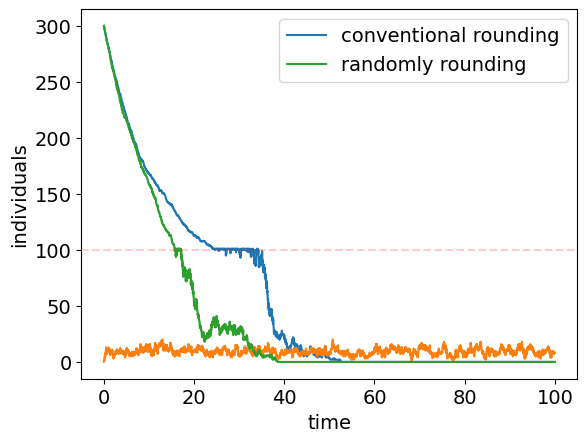

In [240]:
import matplotlib.pyplot as plt
plt.rc('font', size=14)
ax = result.plot(m.legend())
ax.plot(result_random.t_history, result_random.y_history[0, :])
ax.set_ylabel('individuals')
ax.set_yticks(np.arange(0, 301, 50))
ax.set_xlabel('time')
ax.axhline(100, color='red', alpha=0.2, linestyle='--')
ax.legend(['conventional rounding', '_', 'randomly rounding'])
plt.savefig('threshold_clinging.png', dpi=300)